In [1]:
import numpy as np
import itertools

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-poster')

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:

from MomentMatching.baseMomentMatch import MomentMatching, UnscentedTransform, TaylorTransform
from MomentMatching.TimeSeriesModel import TimeSeriesModel, UniformNonlinearGrowthModel
from MomentMatching.StateModels import GaussianState
from MomentMatching.ExpectationPropagation import EPNodes, TopEP

In [5]:
np.random.seed(seed=100)

In [6]:
N = 50
system = UniformNonlinearGrowthModel()
data = system.system_simulation(N)
x_true, x_noisy, y_true, y_noisy = zip(*data)

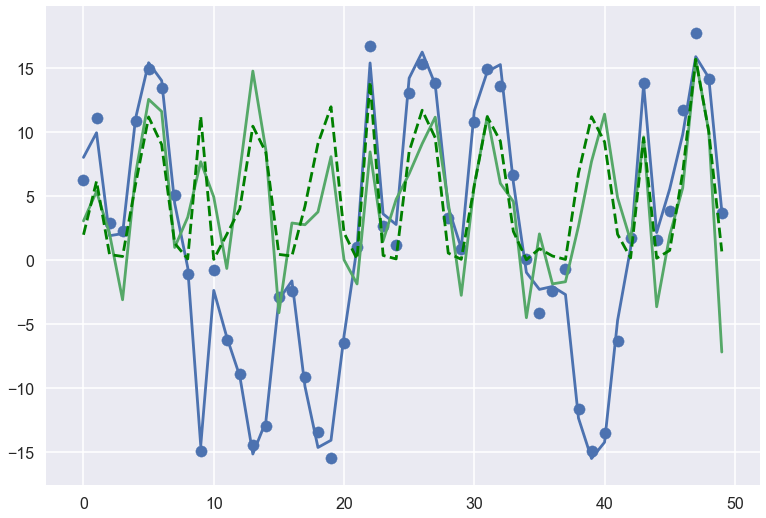

In [7]:
plt.plot(x_true)
plt.scatter(list(range(N)), x_noisy)
plt.plot(y_noisy)
plt.plot(y_true, 'g--')
plt.show()

In [8]:
transform = TaylorTransform(dimension_of_state=1)
# transform = UnscentedTransform(n=1)
Nodes = EPNodes(dimension_of_state=1, N=N)
EP = TopEP(system_model=system, moment_matching=transform.moment_matching)


In [9]:
prior = Nodes[0].copy()
prior.marginal = system.init_dist

In [10]:
# EP.forward_update(Nodes[0], prior, 0.0)

In [11]:
def EP_update(self, Nodes, observations, fargs_list):
    prior = Nodes[0].copy()
    prior.marginal = self.system_model.init_dist
        # GaussianState(mean_vec=np.array([0.1]),
        #                            cov_matrix=0.1 * np.eye(1, dtype=float))
    node_iter, next_node_iter = itertools.tee(Nodes)
    next(next_node_iter, None)
    for node, next_node, obs, fargs in itertools.zip_longest(node_iter, next_node_iter, observations, fargs_list):
        pred_state = self.forward_update(node=node, prev_node=prior, fargs=fargs)
        corrected_state = self.measurement_update(pred_state, obs, fargs)
        
        if next_node is not None:
            smoothed_state = self.backward_update(corrected_state, next_node=next_node, fargs=fargs )
        else:
            smoothed_state = corrected_state
            
        yield smoothed_state
        prior = smoothed_state

In [12]:
def kalman_filter(self, Nodes, observations, fargs_list):
    prior = Nodes[0].copy()
    prior.marginal = self.system_model.init_dist
        # GaussianState(mean_vec=np.array([0.1]),
        #                            cov_matrix=0.1 * np.eye(1, dtype=float))

    for node, obs, fargs in zip(Nodes, observations, fargs_list):
        pred_state = self.forward_update(node=node, prev_node=prior, fargs=fargs)
        corrected_state = self.measurement_update(pred_state, obs, fargs)
        yield corrected_state
        prior = corrected_state

        


In [13]:
system.Q.cov

array([[ 1.]])

In [14]:
ans = EP.kalman_filter( Nodes, y_noisy, range(0, N))

In [15]:
# ans2 = EP_update(EP, Nodes, y_noisy, range(0, N))
# ep_data = list(ans2)

In [16]:
x_filtered = list(ans)
x_filt_mean = [x.marginal.mean for x in x_filtered]

/Users/Pontragyin/Documents/GitHub/pyStateEstimator/MomentMatching/StateModels.py:137: UserWarning: Negative Precision!!!
  warnings.warn('Negative Precision!!!')


[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.00000100e-12]]
[[ -1.0000010

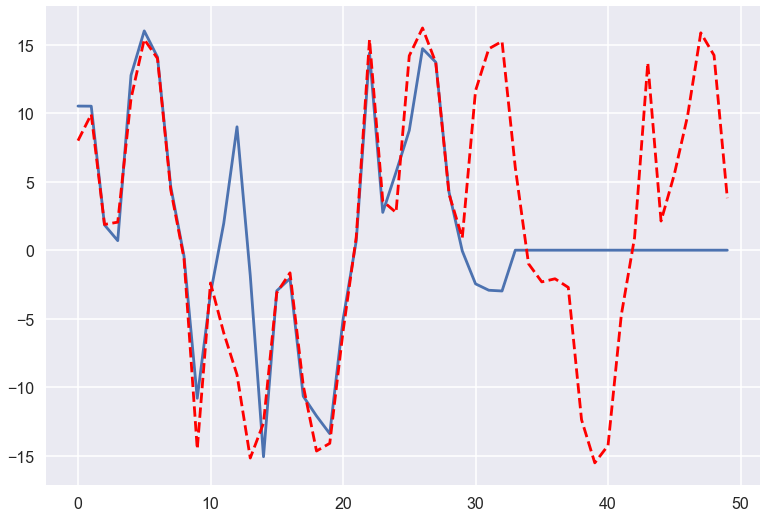

In [17]:
plt.plot(x_filt_mean)
plt.plot(x_true, 'r--', label='x_true')

In [18]:
def plot_gaussian(data):
    x_mean = np.array([x.marginal.mean for x in data])
    x_sigma = np.array([np.sqrt(x.marginal.cov[0, :]) for x in data])
    
    upr = x_mean + 2 * x_sigma
    lwr = x_mean - 2 * x_sigma
#     print(x_mean.shape)
#     print(upr.shape)
#     plt.plot(x_mean)
#     plt.plot(lwr)
#     plt.plot(upr)
#     ax.plt.figure()
    time = np.arange(len(data))
#     time = time[:, np.newaxis]
#     print(time.shape)
    plt.fill_between(time, lwr[:,0], upr[:,0], alpha=0.5)
    
#     print (x1)
#     print(x2)
#     print(x1 + 2 * x2)
#     print(x1 - 2 * x2)

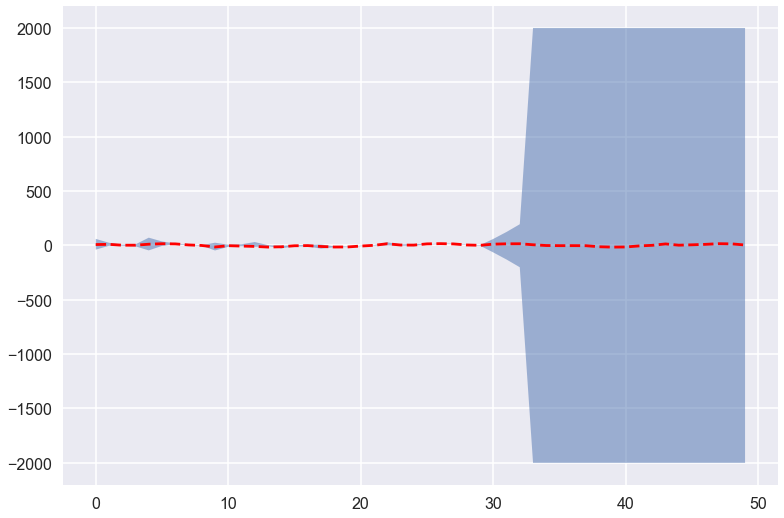

In [19]:
plot_gaussian(x_filtered)
plt.plot(x_true, 'r--', label='x_true')

In [20]:
def kalman_smoother(self, Nodes, fargs_list):
    
    reversedNodes = reversed(Nodes)
    reveresedFargs = reversed(fargs_list)
    
    # Last filtered value is same as first smoothed
    next(reveresedFargs)
    next_node = next(reversedNodes)
    yield next_node
    
    for node, fargs in zip(reversedNodes, reveresedFargs):

        smoothed_node = self.backward_update(node=node, next_node=next_node, fargs=fargs)
        print(f'node {node.t},  next_node {next_node.t}' )
        yield smoothed_node
        next_node = smoothed_node.copy()
        

In [21]:
sms = kalman_smoother(EP, x_filtered, list(range(0, N)))
x_smoothed = (list(sms))

[[ -1.00000100e-12]]
[[ -1.00000100e-12]]


/Users/Pontragyin/Documents/GitHub/pyStateEstimator/MomentMatching/StateModels.py:137: UserWarning: Negative Precision!!!
  warnings.warn('Negative Precision!!!')


TypeError: float() argument must be a string or a number, not 'GaussianState'

In [ ]:

x_smoothed_mean = [x.marginal.mean for x in reversed(x_smoothed)]

In [ ]:
[x.marginal.cov for x in reversed(x_smoothed)]

In [ ]:
plt.plot(x_true, 'r--', label='x_true')
plt.plot(x_filt_mean, 'b', label='x_filtered')
plt.plot(x_smoothed_mean, 'g', label='x_smoothed')


In [ ]:
plot_gaussian(x_filtered)
plot_gaussian(x_smoothed)
plt.plot(x_true, 'r--', label='x_true')

In [ ]:
ans = kalman_filter(EP, list(reversed(x_smoothed)), y_noisy, range(0, N))
x_filtered2 = list(ans)

In [ ]:
x_filt_mean2 = [x.marginal.mean for x in x_filtered2]

In [ ]:
plt.plot(x_true, 'r--', label='x_true')
plt.plot(x_filt_mean, 'b', label='x_filtered')
plt.plot(x_smoothed_mean, 'g', label='x_smoothed')
plt.plot(x_filt_mean2, 'b--', label='x_smthd_filt')